In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')

from pathlib import Path
import pandas as pd
from zipfile import ZipFile
from matplotlib import pyplot as plt
import seaborn as sns
from pns_dict import PnsDict
import copy
from feature_eng import add_new_atributes
from IPython.core.display import Markdown
from scipy.stats import chi2_contingency

sns.set(style="whitegrid")
PNS_DATA = Path('../data/processed/PNS_2019/all.zip').resolve()
zip_pns = ZipFile(PNS_DATA)
df = pd.read_csv(zip_pns.open(zip_pns.namelist()[0]), sep=",", low_memory=False)

df, PNS_DICT = add_new_atributes(df, PnsDict())

PATH_GEN_DATA = Path('generated_data/pns_data_analysis').resolve()

def save_fig(fig_i, name):
    fig_i.savefig(PATH_GEN_DATA / '01_pns_{}.png'.format(name), bbox_inches='tight')
    fig_i.savefig(PATH_GEN_DATA / '01_pns_{}.pdf'.format(name), bbox_inches='tight')

# Como é a distribuição de sintomas depressivos por idade

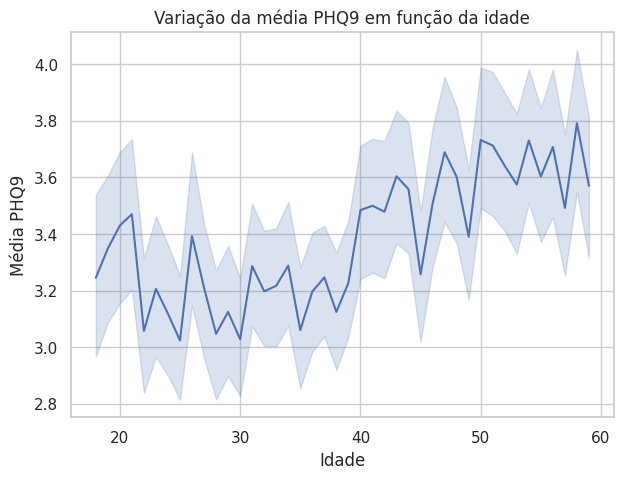

In [2]:
fig, ax = plt.subplots(figsize=(7, 5))

selected = df[['idade', 'phq9_total']]
selected = selected.dropna()
sns.lineplot(data=selected, x="idade", y="phq9_total")
ax.set_ylabel('Média PHQ9')
ax.set_xlabel('Idade')
ax.set_title("Variação da média PHQ9 em função da idade")
save_fig(fig, 'idade_phq9')

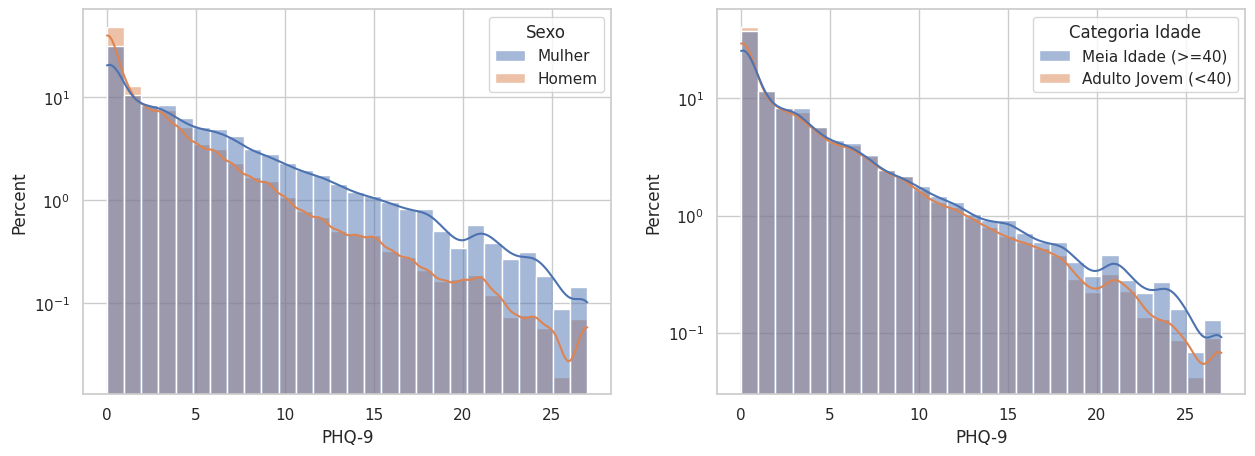

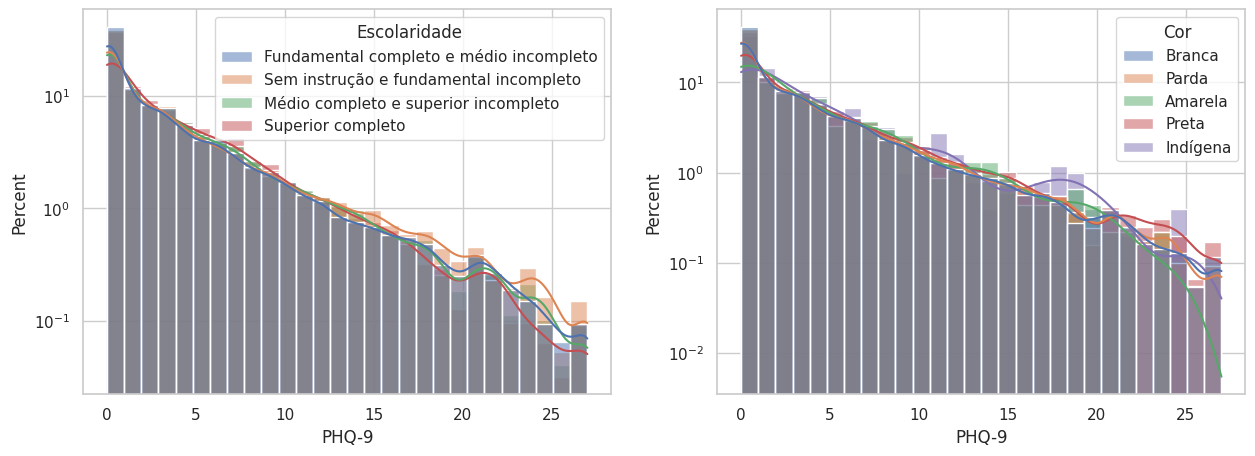

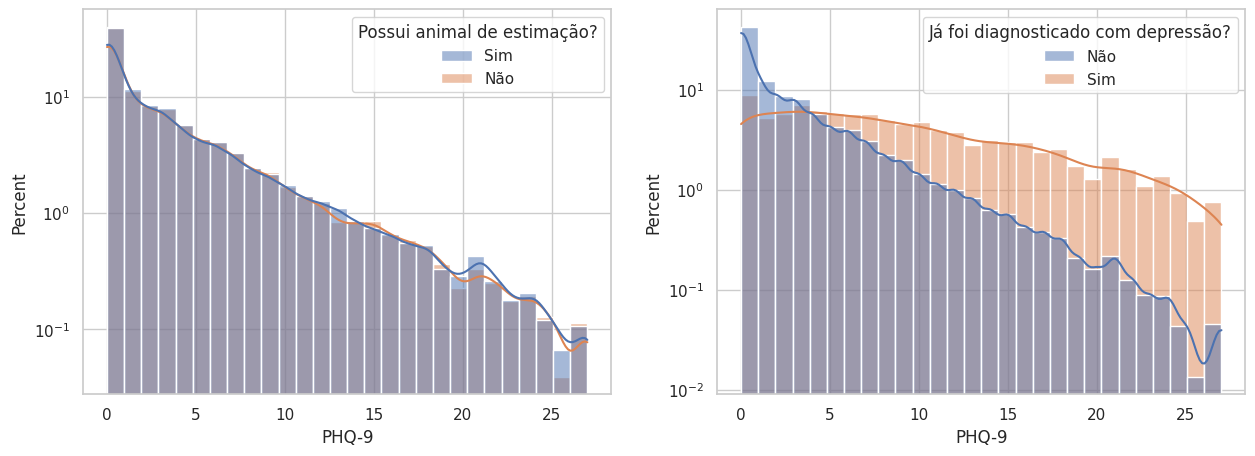

In [3]:
selected = df

def plot_dist_phq9(df_i, key, pv, tl, ax):
    df_i = copy.deepcopy(df_i)
    if pv is not None:
        df_i[tl] = df_i[key].map(pv)
    else:
        df_i[tl] = df_i[key]

    ax.set_yscale('log')
    sns.histplot(df_i, hue=tl, x='phq9_total', bins=28, kde=True, ax=ax, stat='percent', label='Sexo', cumulative=False, common_norm=False)
    ax.set_xlabel("PHQ-9")


fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_dist_phq9(selected, 'sexo', PNS_DICT.get_pv_dict('sexo'), 'Sexo', ax[0])
plot_dist_phq9(selected, 'idade_cat', PNS_DICT.get_pv_dict('idade_cat'), 'Categoria Idade', ax[1])
plt.show()
save_fig(fig, 'compare_dist_phq9_startos1')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_dist_phq9(selected, 'escolaridade_agregada', PNS_DICT.get_pv_dict('escolaridade_agregada'), 'Escolaridade', ax[0])
plot_dist_phq9(selected, 'cor', PNS_DICT.get_pv_dict('cor'), 'Cor', ax[1])
plt.show()
save_fig(fig, 'compare_dist_phq9_startos2')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_dist_phq9(selected, 'Q092', PNS_DICT.get_pv_dict('Q092'), 'Já foi diagnosticado com depressão?', ax[1])
plot_dist_phq9(selected, 'casa_animal', PNS_DICT.get_pv_dict('casa_animal'), 'Possui animal de estimação?', ax[0])
plt.show()
save_fig(fig, 'compare_dist_phq9_startos3')

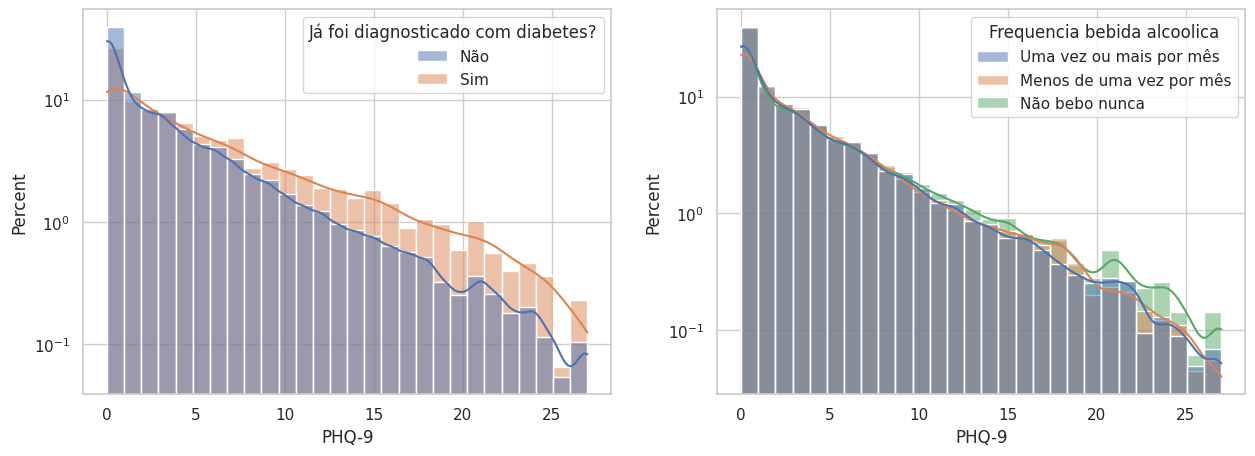

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_dist_phq9(df, 'Q03001', PNS_DICT.get_pv_dict('Q03001'), 'Já foi diagnosticado com diabetes?', ax[0])
plot_dist_phq9(df, 'P027', PNS_DICT.get_pv_dict('P027'), "Frequencia bebida alcoolica", ax[1])

plt.show()

### Nivel de escolaridade e renda per capita

renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
escolaridade_agregada,,,,,,,
Sem instrução e fundamental incompleto,4854,6225,10844,7394,1624,702,239
Fundamental completo e médio incompleto,2596,4732,8494,7690,2226,1261,614
Médio completo e superior incompleto,393,718,2167,3571,2092,2005,2123
Superior completo,29,48,182,635,631,837,1516


Normalizado pelas linhas: 


renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
escolaridade_agregada,,,,,,,
Sem instrução e fundamental incompleto,15.224892,19.525124,34.012923,23.191770,5.093783,2.201869,0.749639
Fundamental completo e médio incompleto,9.401369,17.136856,30.760874,27.849201,8.061420,4.566690,2.223590
Médio completo e superior incompleto,3.007116,5.493917,16.581223,27.324202,16.007346,15.341648,16.244548
Superior completo,0.747808,1.237751,4.693141,16.374420,16.271274,21.583290,39.092316



Normalizado pelas colunas: 


renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
escolaridade_agregada,,,,,,,
Sem instrução e fundamental incompleto,61.661585,53.100742,50.002306,38.330741,24.707135,14.609781,5.320570
Fundamental completo e médio incompleto,32.977642,40.365094,39.166321,39.865215,33.865815,26.243496,13.668744
Médio completo e superior incompleto,4.992378,6.124712,9.992161,18.512182,31.827172,41.727367,47.261799
Superior completo,0.368394,0.409452,0.839212,3.291861,9.599878,17.419355,33.748887


chi2: 23047.025547068377, p_value: 0.0, dof: 18
-------------------------------------------------------------



### Raça-cor e renda per capita

renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
cor,,,,,,,
Branca,1911,3257,7918,9155,3949,3259,3512
Preta,1205,1790,3368,2533,718,414,245
Amarela,48,74,156,168,78,68,85
Parda,6228,8815,14605,10346,2779,1756,1226
Indígena,109,132,220,146,41,23,11


Normalizado pelas linhas: 


renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
cor,,,,,,,
Branca,5.797761,9.881375,24.022329,27.775250,11.980826,9.887443,10.655017
Preta,11.729777,17.424316,32.784970,24.656868,6.989195,4.029982,2.384892
Amarela,7.090103,10.930576,23.042836,24.815362,11.521418,10.044313,12.555391
Parda,13.611627,19.265654,31.920009,22.611736,6.073653,3.837832,2.679489
Indígena,15.982405,19.354839,32.258065,21.407625,6.011730,3.372434,1.612903



Normalizado pelas colunas: 


renda_pc,Até ¼ salário mínimo,Mais de ¼ até ½ salário mínimo,Mais de ½ até 1 salário mínimo,Mais de 1 até 2 salários mínimos,Mais de 2 até 3 salários mínimos,Mais de 3 até 5 salários mínimos,Mais de 5 salários mínimos
cor,,,,,,,
Branca,20.113672,23.151834,30.144288,40.965635,52.200925,59.039855,69.147470
Preta,12.682875,12.723912,12.822172,11.334348,9.491077,7.500000,4.823784
Amarela,0.505210,0.526016,0.593901,0.751745,1.031064,1.231884,1.673558
Parda,65.550995,62.659937,55.602086,46.294970,36.734964,31.811594,24.138610
Indígena,1.147248,0.938300,0.837553,0.653302,0.541970,0.416667,0.216578


chi2: 7517.540990849386, p_value: 0.0, dof: 24
-------------------------------------------------------------



### Percepção de saúde e nível de escolaridade

escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N001,,,,
Muito boa,2127,3871,2781,1122
Boa,13640,14926,7191,2143
Regular,12795,7695,2728,548
Ruim,2683,925,296,58
Muito ruim,644,206,74,7


Normalizado pelas linhas: 


escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N001,,,,
Muito boa,21.482679,39.097061,28.088072,11.332189
Boa,35.989446,39.382586,18.973615,5.654354
Regular,53.837415,32.378187,11.478583,2.305815
Ruim,67.718324,23.346795,7.470974,1.463907
Muito ruim,69.172932,22.126745,7.948443,0.751880



Normalizado pelas colunas: 


escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N001,,,,
Muito boa,6.670012,14.013684,21.277735,28.932439
Boa,42.773370,54.034681,55.019128,55.260444
Regular,40.123554,27.857220,20.872226,14.130995
Ruim,8.413560,3.348659,2.264728,1.495616
Muito ruim,2.019505,0.745755,0.566182,0.180505


chi2: 6137.038260521892, p_value: 0.0, dof: 12
-------------------------------------------------------------



### Percepção de saúde segundo OMS e nível de escolaridade

escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N00101,,,,
Muito boa,2795,4624,3105,1219
Boa,17982,16873,7699,2154
Regular,9079,5304,1966,455
Ruim,1665,679,245,46
Muito ruim,368,143,55,4


Normalizado pelas linhas: 


escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N00101,,,,
Muito boa,23.801414,39.376650,26.441284,10.380652
Boa,40.220990,37.740449,17.220632,4.817930
Regular,54.028803,31.563913,11.699595,2.707689
Ruim,63.187856,25.768501,9.297913,1.745731
Muito ruim,64.561404,25.087719,9.649123,0.701754



Normalizado pelas colunas: 


escolaridade_agregada,Sem instrução e fundamental incompleto,Fundamental completo e médio incompleto,Médio completo e superior incompleto,Superior completo
N00101,,,,
Muito boa,8.764778,16.739673,23.756695,31.433729
Boa,56.389351,61.083155,58.905891,55.544095
Regular,28.470633,19.201390,15.042081,11.732852
Ruim,5.221236,2.458097,1.874522,1.186178
Muito ruim,1.154003,0.517685,0.420811,0.103146


chi2: 4083.091991570913, p_value: 0.0, dof: 12
-------------------------------------------------------------



### Percepção de saúde e raça-cor

cor,Branca,Preta,Amarela,Parda,Indígena
N001,,,,,
Muito boa,5595,1162,112,4973,72
Boa,16766,4883,338,22309,319
Regular,8790,3406,193,15149,229
Ruim,1459,672,28,2699,50
Muito ruim,359,155,6,634,12


Normalizado pelas linhas: 


cor,Branca,Preta,Amarela,Parda,Indígena
N001,,,,,
Muito boa,46.961558,9.753231,0.940071,41.740809,0.604331
Boa,37.579289,10.944750,0.757593,50.003362,0.715006
Regular,31.656283,12.266359,0.695070,54.557568,0.824720
Ruim,29.726976,13.691932,0.570497,54.991850,1.018745
Muito ruim,30.789022,13.293310,0.514580,54.373928,1.029160



Normalizado pelas colunas: 


cor,Branca,Preta,Amarela,Parda,Indígena
N001,,,,,
Muito boa,16.970487,11.305701,16.543575,10.866620,10.557185
Boa,50.853832,47.509243,49.926145,48.747924,46.774194
Regular,26.661409,33.138743,28.508124,33.102439,33.577713
Ruim,4.425369,6.538237,4.135894,5.897649,7.331378
Muito ruim,1.088902,1.508076,0.886263,1.385368,1.759531


chi2: 1020.9872814531317, p_value: 3.58851699178534e-207, dof: 16
-------------------------------------------------------------



### Percepção de saúde segundo OMS e raça-cor

cor,Branca,Preta,Amarela,Parda,Indígena
N00101,,,,,
Muito boa,6275,1432,128,5962,99
Boa,18956,5922,393,26758,375
Regular,6431,2386,134,10881,171
Ruim,1090,421,16,1794,32
Muito ruim,217,117,6,369,5


Normalizado pelas linhas: 


cor,Branca,Preta,Amarela,Parda,Indígena
N00101,,,,,
Muito boa,45.156880,10.305124,0.921128,42.904433,0.712435
Boa,36.172811,11.300664,0.749943,51.060988,0.715594
Regular,32.150177,11.928211,0.669900,54.396840,0.854872
Ruim,32.508202,12.555920,0.477185,53.504324,0.954369
Muito ruim,30.392157,16.386555,0.840336,51.680672,0.700280



Normalizado pelas colunas: 


cor,Branca,Preta,Amarela,Parda,Indígena
N00101,,,,,
Muito boa,19.033031,13.932672,18.906942,13.027707,14.516129
Boa,57.496436,57.618214,58.050222,58.469539,54.985337
Regular,19.506203,23.214633,19.793205,23.776331,25.073314
Ruim,3.306136,4.096128,2.363368,3.920112,4.692082
Muito ruim,0.658194,1.138354,0.886263,0.806311,0.733138


chi2: 695.9424696839698, p_value: 9.444638295739669e-138, dof: 16
-------------------------------------------------------------



### Sexo

depression_p,False,True
sexo,,
Homem,41823,690
Mulher,45647,2210


Normalizado pelas linhas: 


depression_p,False,True
sexo,,
Homem,98.376967,1.623033
Mulher,95.382076,4.617924



Normalizado pelas colunas: 


depression_p,False,True
sexo,,
Homem,47.814108,23.793103
Mulher,52.185892,76.206897


chi2: 650.1244558930703, p_value: 2.0991548153970957e-143, dof: 1


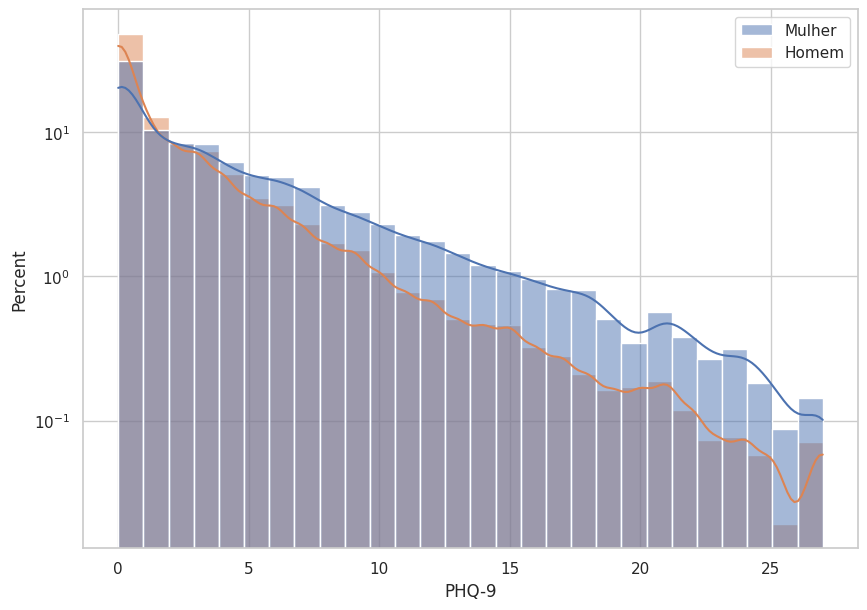

-------------------------------------------------------------



### Cor

depression_p,False,True
cor,,
Branca,32026,943
Preta,9892,386
Amarela,659,18
Parda,44239,1525
Indígena,654,28


Normalizado pelas linhas: 


depression_p,False,True
cor,,
Branca,97.139737,2.860263
Preta,96.244406,3.755594
Amarela,97.341211,2.658789
Parda,96.667686,3.332314
Indígena,95.894428,4.105572



Normalizado pelas colunas: 


depression_p,False,True
cor,,
Branca,36.613696,32.517241
Preta,11.309020,13.310345
Amarela,0.753401,0.620690
Parda,50.576198,52.586207
Indígena,0.747685,0.965517


chi2: 27.460576859111317, p_value: 1.6040679105467477e-05, dof: 4


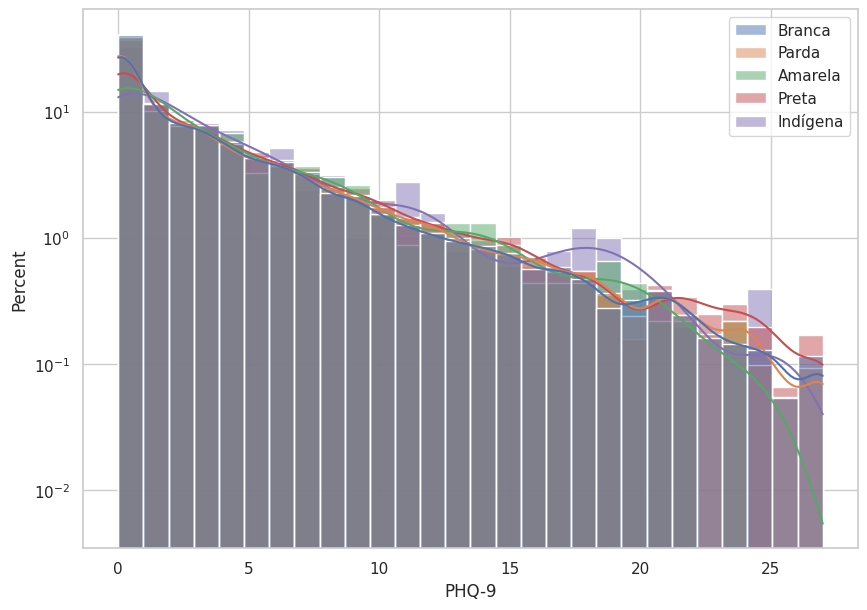

-------------------------------------------------------------



### Categoria idade

depression_p,False,True
idade_cat,,
Adulto Jovem (<40),34392,1264
Meia Idade (>=40),53554,1636


Normalizado pelas linhas: 


depression_p,False,True
idade_cat,,
Adulto Jovem (<40),96.455015,3.544985
Meia Idade (>=40),97.035695,2.964305



Normalizado pelas colunas: 


depression_p,False,True
idade_cat,,
Adulto Jovem (<40),39.105815,43.586207
Meia Idade (>=40),60.894185,56.413793


chi2: 23.63517941627903, p_value: 1.1643922790002648e-06, dof: 1


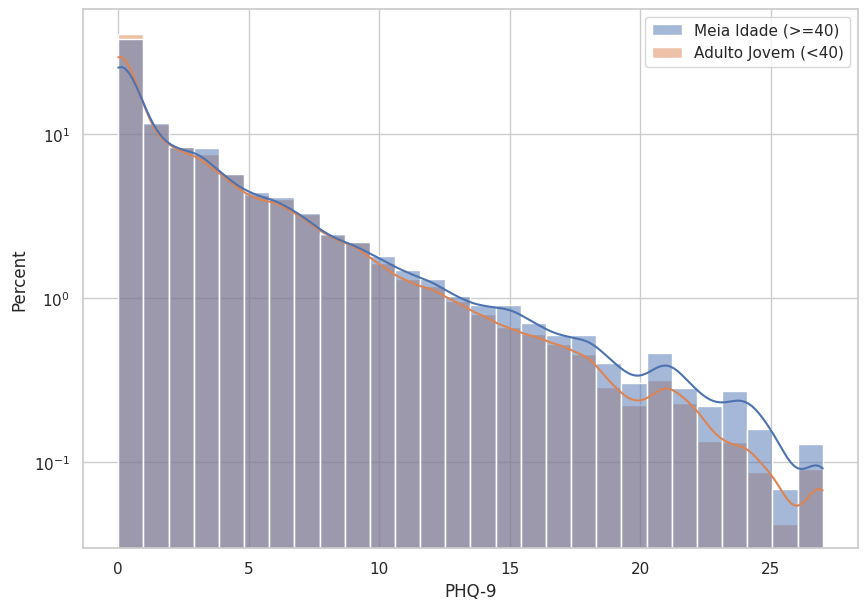

-------------------------------------------------------------



### Escolaridade

depression_p,False,True
escolaridade_agregada,,
Sem instrução e fundamental incompleto,30800,1089
Fundamental completo e médio incompleto,26663,960
Médio completo e superior incompleto,12683,387
Superior completo,3763,115


Normalizado pelas linhas: 


depression_p,False,True
escolaridade_agregada,,
Sem instrução e fundamental incompleto,96.585029,3.414971
Fundamental completo e médio incompleto,96.524635,3.475365
Médio completo e superior incompleto,97.039021,2.960979
Superior completo,97.034554,2.965446



Normalizado pelas colunas: 


depression_p,False,True
escolaridade_agregada,,
Sem instrução e fundamental incompleto,41.672868,42.689142
Fundamental completo e médio incompleto,36.075444,37.632301
Médio completo e superior incompleto,17.160292,15.170521
Superior completo,5.091396,4.508036


chi2: 9.630887117105123, p_value: 0.02197894444717136, dof: 3


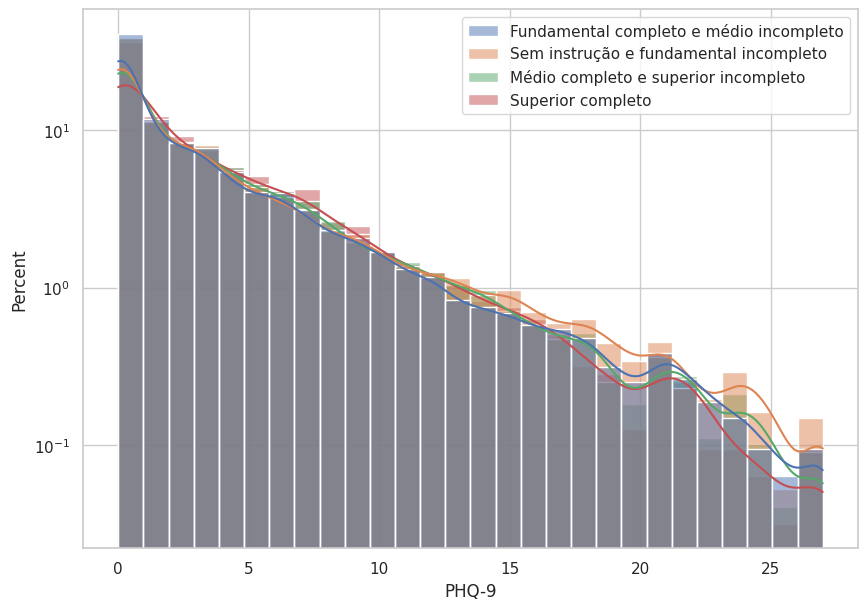

-------------------------------------------------------------



### Percepção da própria saúde

depression_p,False,True
N001,,
Muito boa,11795,119
Boa,43923,692
Regular,26492,1275
Ruim,4331,577
Muito ruim,929,237


Normalizado pelas linhas: 


depression_p,False,True
N001,,
Muito boa,99.001175,0.998825
Boa,98.448952,1.551048
Regular,95.408218,4.591782
Ruim,88.243684,11.756316
Muito ruim,79.674099,20.325901



Normalizado pelas colunas: 


depression_p,False,True
N001,,
Muito boa,13.484623,4.103448
Boa,50.214931,23.862069
Regular,30.286956,43.965517
Ruim,4.951412,19.896552
Muito ruim,1.062078,8.172414


chi2: 3007.405389314013, p_value: 0.0, dof: 4


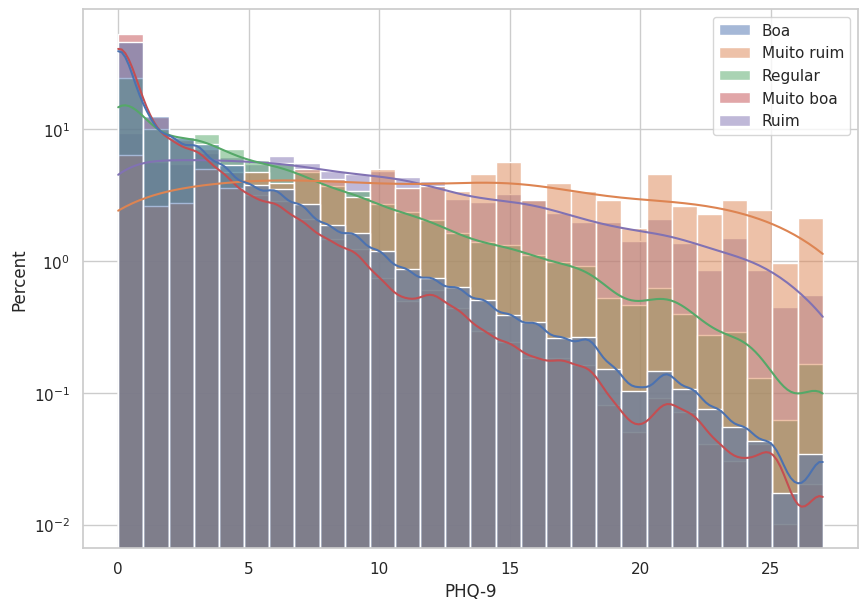

-------------------------------------------------------------



### Percepção da saúde segundo a OMS

depression_p,False,True
N00101,,
Muito boa,13788,108
Boa,51576,828
Regular,18827,1176
Ruim,2759,594
Muito ruim,520,194


Normalizado pelas linhas: 


depression_p,False,True
N00101,,
Muito boa,99.222798,0.777202
Boa,98.419968,1.580032
Regular,94.120882,5.879118
Ruim,82.284521,17.715479
Muito ruim,72.829132,27.170868



Normalizado pelas colunas: 


depression_p,False,True
N00101,,
Muito boa,15.763119,3.724138
Boa,58.964216,28.551724
Regular,21.523951,40.551724
Ruim,3.154224,20.482759
Muito ruim,0.594490,6.689655


chi2: 4762.962736471147, p_value: 0.0, dof: 4


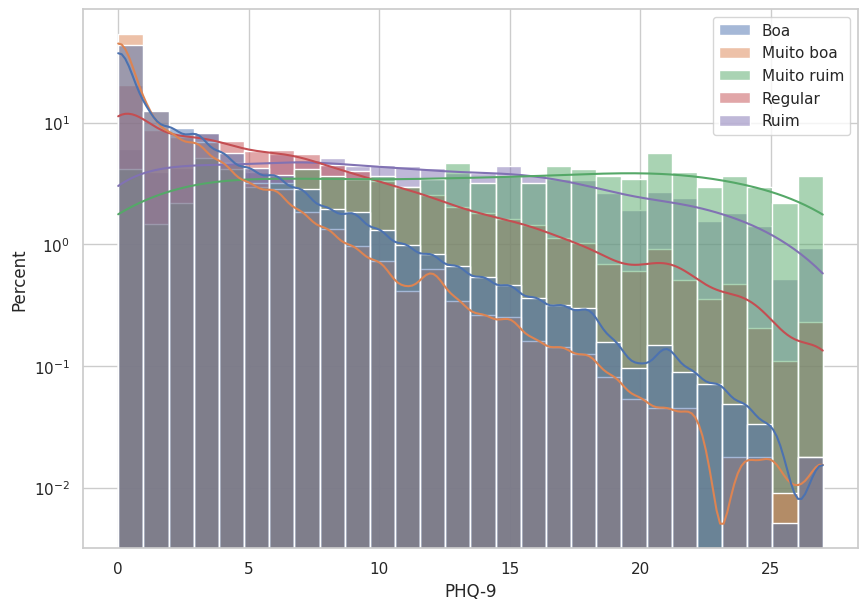

-------------------------------------------------------------



### Possui animal de estimação?

depression_p,False,True
casa_animal,,
Sim,51859,1763
Não,35611,1137


Normalizado pelas linhas: 


depression_p,False,True
casa_animal,,
Sim,96.712170,3.287830
Não,96.905954,3.094046



Normalizado pelas colunas: 


depression_p,False,True
casa_animal,,
Sim,59.287756,60.793103
Não,40.712244,39.206897


chi2: 2.636199700748006, p_value: 0.1044531334019662, dof: 1


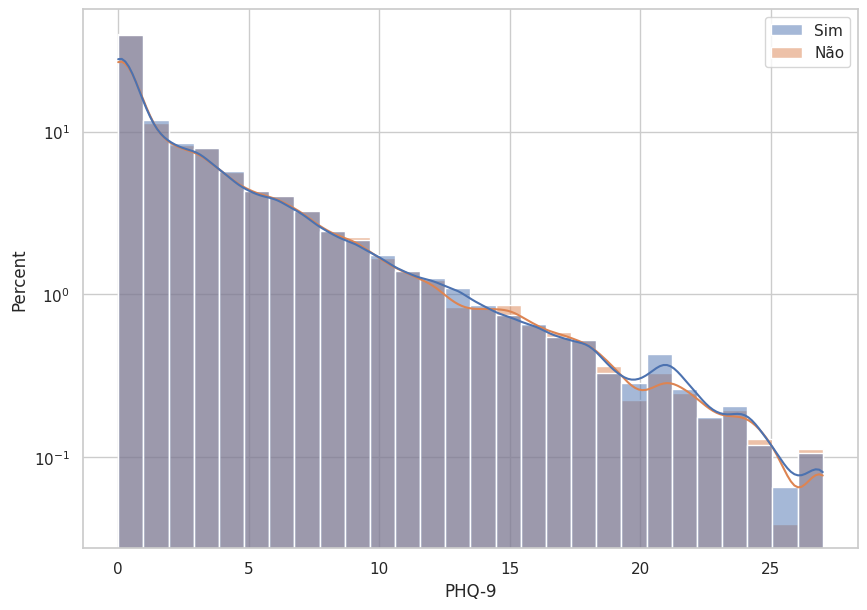

-------------------------------------------------------------



### Renda per capita

depression_p,False,True
renda_pc,,
Até ¼ salário mínimo,9020,481
Mais de ¼ até ½ salário mínimo,13478,590
Mais de ½ até 1 salário mínimo,25394,873
Mais de 1 até 2 salários mínimos,21761,587
Mais de 2 até 3 salários mínimos,7379,186
Mais de 3 até 5 salários mínimos,5422,98
Mais de 5 salários mínimos,4994,85


Normalizado pelas linhas: 


depression_p,False,True
renda_pc,,
Até ¼ salário mínimo,94.937375,5.062625
Mais de ¼ até ½ salário mínimo,95.806085,4.193915
Mais de ½ até 1 salário mínimo,96.676438,3.323562
Mais de 1 até 2 salários mínimos,97.373367,2.626633
Mais de 2 até 3 salários mínimos,97.541309,2.458691
Mais de 3 até 5 salários mínimos,98.224638,1.775362
Mais de 5 salários mínimos,98.326442,1.673558



Normalizado pelas colunas: 


depression_p,False,True
renda_pc,,
Até ¼ salário mínimo,10.314701,16.586207
Mais de ¼ até ½ salário mínimo,15.412588,20.344828
Mais de ½ até 1 salário mínimo,29.038972,30.103448
Mais de 1 até 2 salários mínimos,24.884503,20.241379
Mais de 2 até 3 salários mínimos,8.438158,6.413793
Mais de 3 até 5 salários mínimos,6.200256,3.379310
Mais de 5 salários mínimos,5.710822,2.931034


chi2: 263.2751810852181, p_value: 5.954547362228496e-54, dof: 6


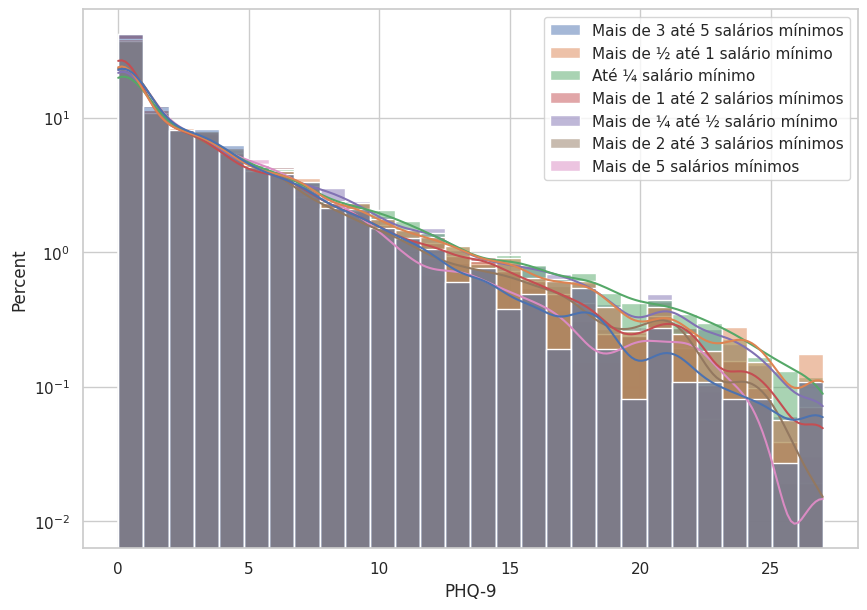

-------------------------------------------------------------



### Frequência bebida alcoólica

depression_p,False,True
P027,,
Não bebo nunca,53389,1801
Menos de uma vez por mês,10673,362
Uma vez ou mais por mês,23408,737


Normalizado pelas linhas: 


depression_p,False,True
P027,,
Não bebo nunca,96.736728,3.263272
Menos de uma vez por mês,96.719529,3.280471
Uma vez ou mais por mês,96.947608,3.052392



Normalizado pelas colunas: 


depression_p,False,True
P027,,
Não bebo nunca,61.036927,62.103448
Menos de uma vez por mês,12.201898,12.482759
Uma vez ou mais por mês,26.761175,25.413793


chi2: 2.611396249192711, p_value: 0.27098328889541073, dof: 2


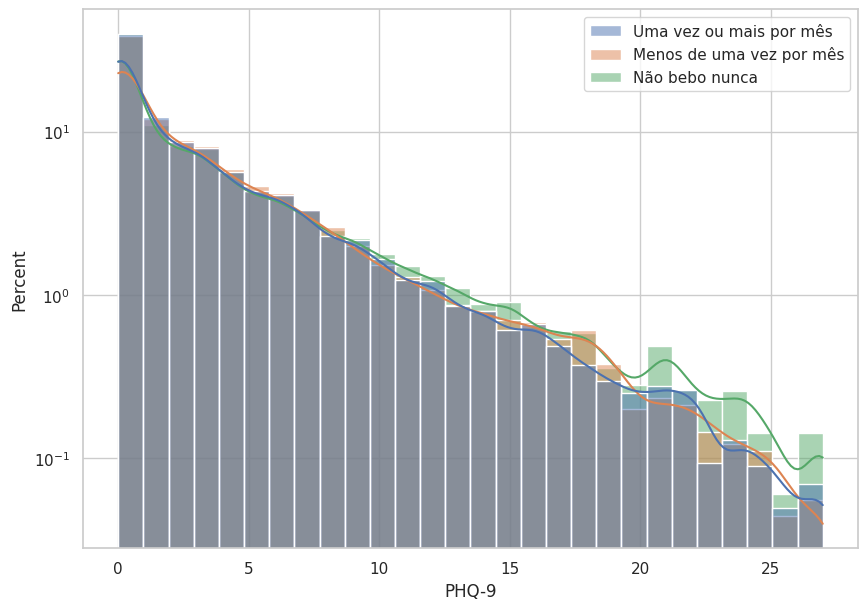

-------------------------------------------------------------



### Fuma tabaco

depression_p,False,True
P050,,
"Sim, diariamente",9660,487
"Sim, menos que diariamente",1126,53
Não fumo atualmente,76684,2360


Normalizado pelas linhas: 


depression_p,False,True
P050,,
"Sim, diariamente",95.200552,4.799448
"Sim, menos que diariamente",95.504665,4.495335
Não fumo atualmente,97.014321,2.985679



Normalizado pelas colunas: 


depression_p,False,True
P050,,
"Sim, diariamente",11.043786,16.793103
"Sim, menos que diariamente",1.287299,1.827586
Não fumo atualmente,87.668915,81.379310


chi2: 101.60826014395812, p_value: 8.630712537649896e-23, dof: 2


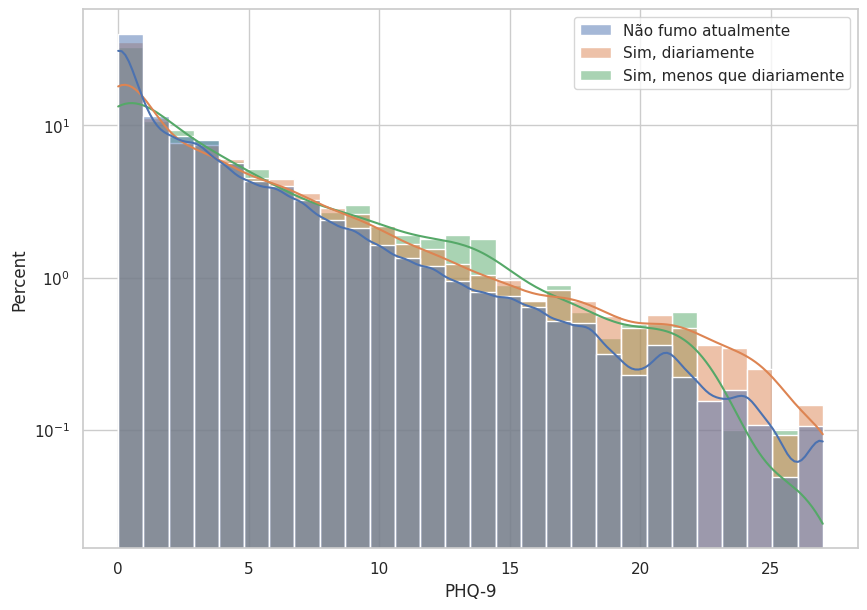

-------------------------------------------------------------



### Atividade fisica nos ultimos 3 meses

depression_p,False,True
P034,,
Sim,35316,895
Não,52154,2005


Normalizado pelas linhas: 


depression_p,False,True
P034,,
Sim,97.528375,2.471625
Não,96.297938,3.702062



Normalizado pelas colunas: 


depression_p,False,True
P034,,
Sim,40.374986,30.862069
Não,59.625014,69.137931


chi2: 105.77855819930565, p_value: 8.245296391605715e-25, dof: 1


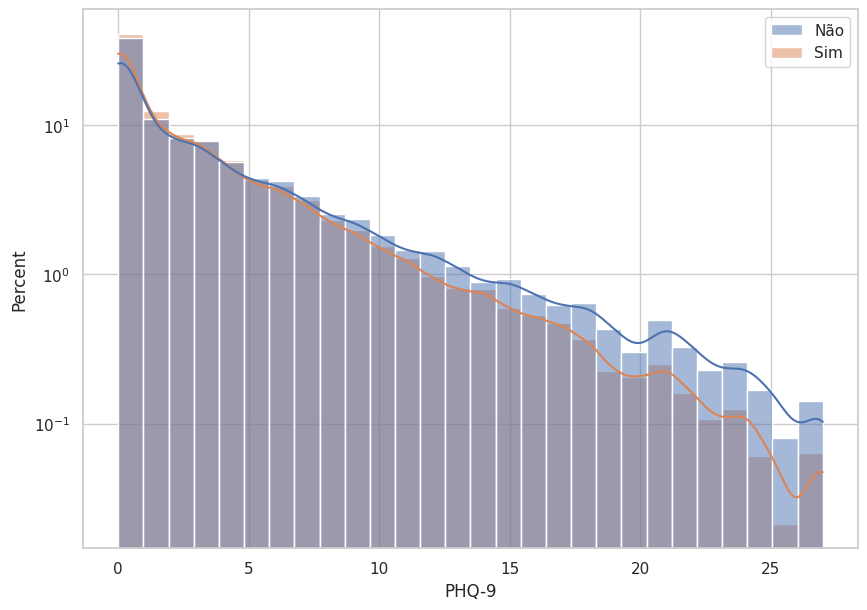

-------------------------------------------------------------



### Teve diganostico artrite ou reumatismo

depression_p,False,True
Q079,,
Sim,6764,425
Não,80706,2475


Normalizado pelas linhas: 


depression_p,False,True
Q079,,
Sim,94.088190,5.911810
Não,97.024561,2.975439



Normalizado pelas colunas: 


depression_p,False,True
Q079,,
Sim,7.732937,14.655172
Não,92.267063,85.344828


chi2: 183.68830842232757, p_value: 7.588518198462411e-42, dof: 1


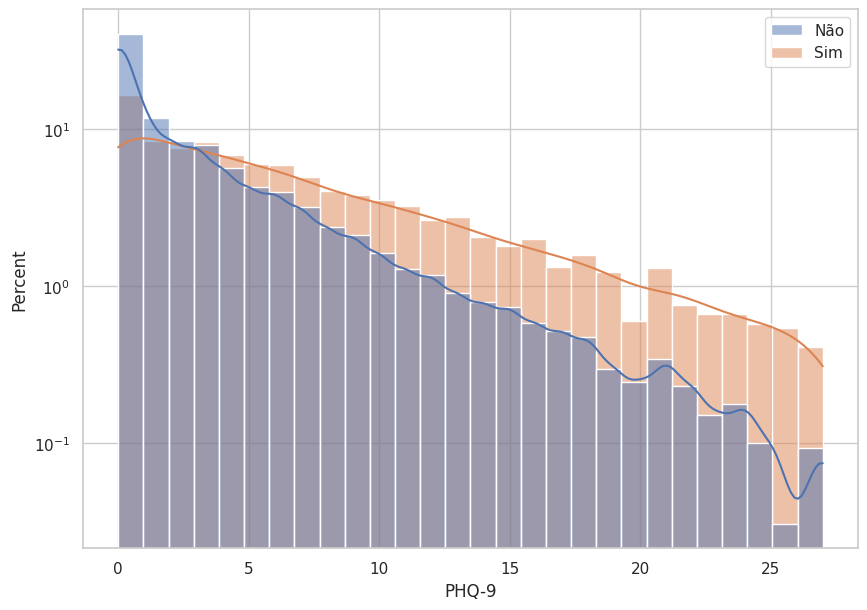

-------------------------------------------------------------



### Teve diganostico AVC

depression_p,False,True
Q068,,
Sim,1851,118
Não,85619,2782


Normalizado pelas linhas: 


depression_p,False,True
Q068,,
Sim,94.007110,5.992890
Não,96.852977,3.147023



Normalizado pelas colunas: 


depression_p,False,True
Q068,,
Sim,2.116154,4.068966
Não,97.883846,95.931034


chi2: 50.22259158454231, p_value: 1.3725848344604343e-12, dof: 1


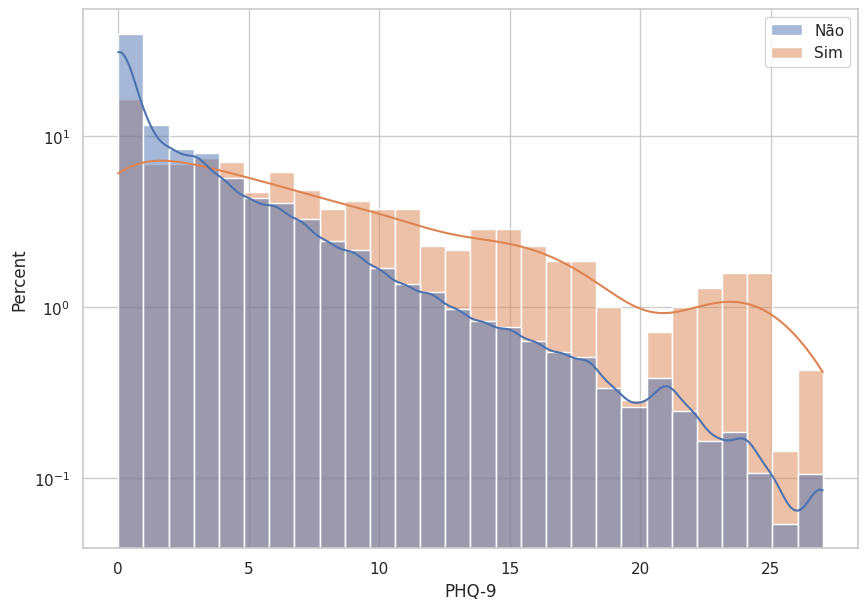

-------------------------------------------------------------



### Teve diganostico doenças cardiovasculares

depression_p,False,True
Q06306,,
Sim,4420,296
Não,83050,2604


Normalizado pelas linhas: 


depression_p,False,True
Q06306,,
Sim,93.723494,6.276506
Não,96.959862,3.040138



Normalizado pelas colunas: 


depression_p,False,True
Q06306,,
Sim,5.053161,10.206897
Não,94.946839,89.793103


chi2: 150.73156475517936, p_value: 1.199663915461858e-34, dof: 1


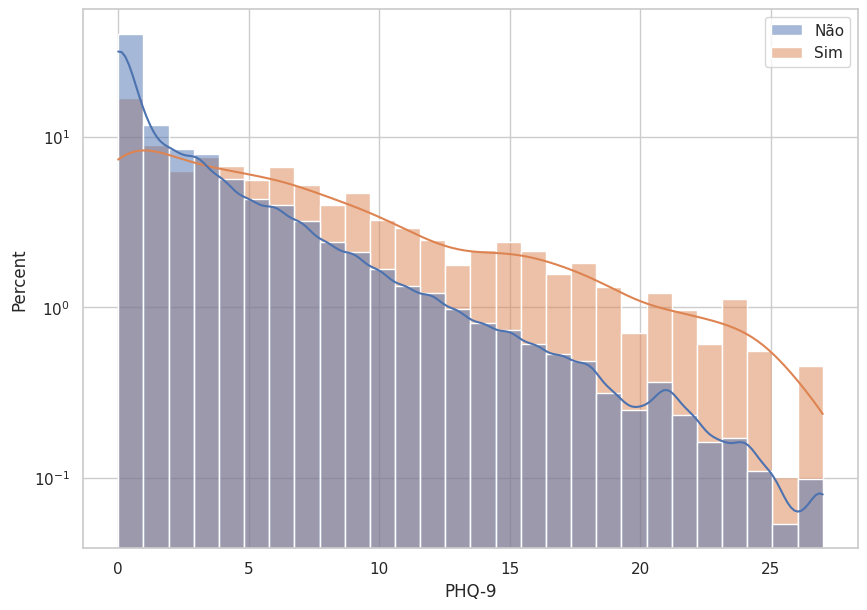

-------------------------------------------------------------



### Teve diganostico hipercolesterolemia

depression_p,False,True
Q060,,
Sim,12743,662
Não,66995,2075


Normalizado pelas linhas: 


depression_p,False,True
Q060,,
Sim,95.061544,4.938456
Não,96.995801,3.004199



Normalizado pelas colunas: 


depression_p,False,True
Q060,,
Sim,15.981088,24.187066
Não,84.018912,75.812934


chi2: 130.90821150013366, p_value: 2.593242991288927e-30, dof: 1


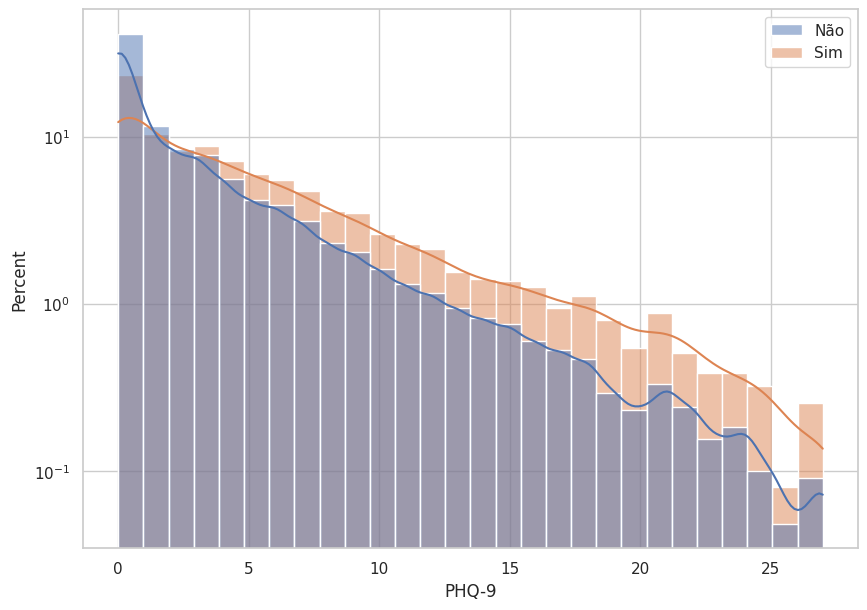

-------------------------------------------------------------



### Teve diganostico diabetes

depression_p,False,True
Q03001,,
Sim,7046,298
Não,73828,2481


Normalizado pelas linhas: 


depression_p,False,True
Q03001,,
Sim,95.942266,4.057734
Não,96.748745,3.251255



Normalizado pelas colunas: 


depression_p,False,True
Q03001,,
Sim,8.712318,10.723282
Não,91.287682,89.276718


chi2: 13.566851729065355, p_value: 0.0002302151878881775, dof: 1


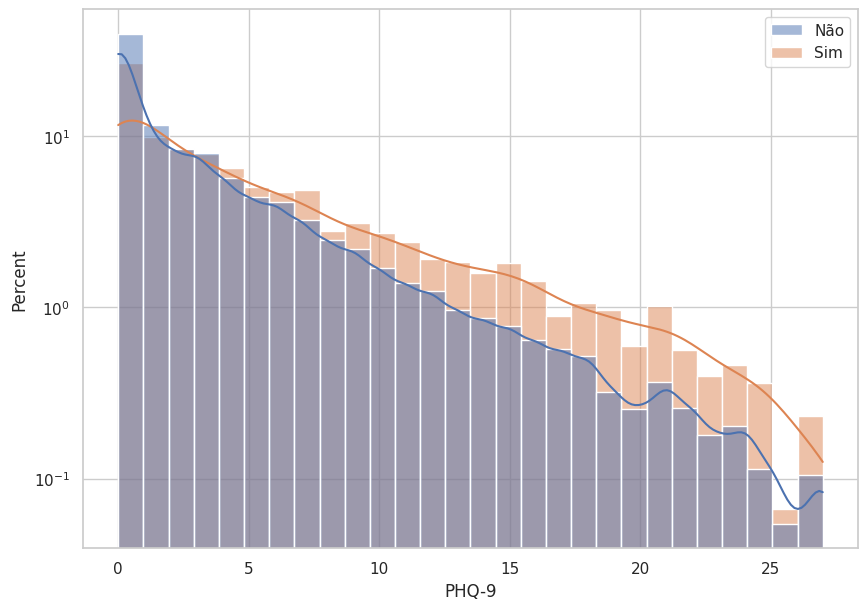

-------------------------------------------------------------



### Teve diganostico pressão alta

depression_p,False,True
Q00201,,
Sim,22823,911
Não,62584,1958


Normalizado pelas linhas: 


depression_p,False,True
Q00201,,
Sim,96.161625,3.838375
Não,96.966317,3.033683



Normalizado pelas colunas: 


depression_p,False,True
Q00201,,
Sim,26.722634,31.753224
Não,73.277366,68.246776


chi2: 35.73478516590861, p_value: 2.260908025676986e-09, dof: 1


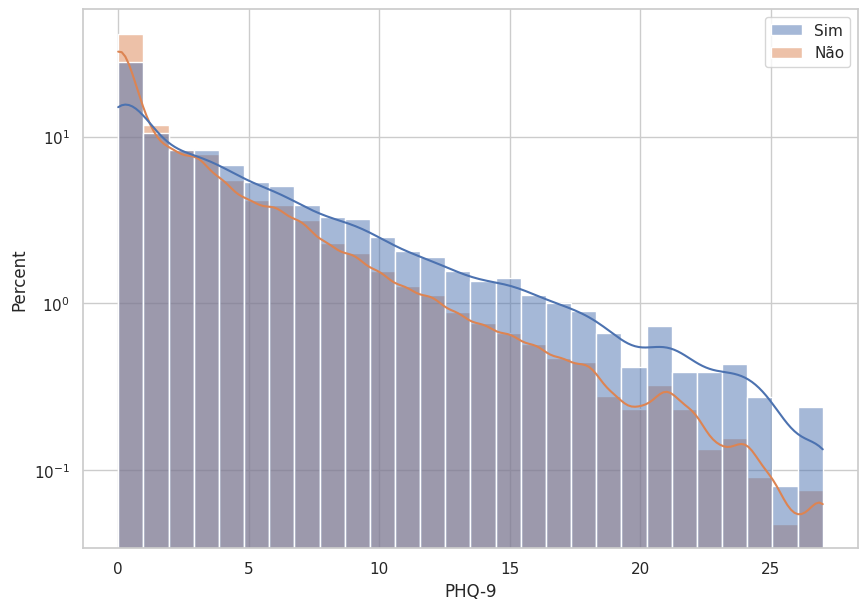

-------------------------------------------------------------



### Teve diganostico cancer

depression_p,False,True
Q120,,
Sim,2209,93
Não,85261,2807


Normalizado pelas linhas: 


depression_p,False,True
Q120,,
Sim,95.960035,4.039965
Não,96.812690,3.187310



Normalizado pelas colunas: 


depression_p,False,True
Q120,,
Sim,2.525437,3.206897
Não,97.474563,96.793103


chi2: 5.250948355941688, p_value: 0.021934813068023893, dof: 1


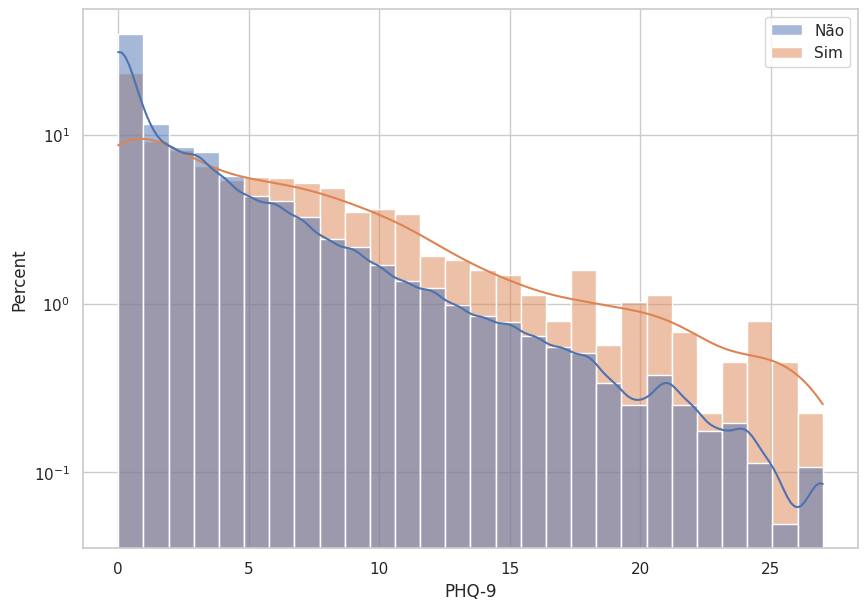

-------------------------------------------------------------



### Teve diganostico depressão

depression_p,False,True
Q092,,
Sim,6988,1303
Não,80482,1597


Normalizado pelas linhas: 


depression_p,False,True
Q092,,
Sim,84.284164,15.715836
Não,98.054314,1.945686



Normalizado pelas colunas: 


depression_p,False,True
Q092,,
Sim,7.989025,44.931034
Não,92.010975,55.068966


chi2: 4597.09491229266, p_value: 0.0, dof: 1


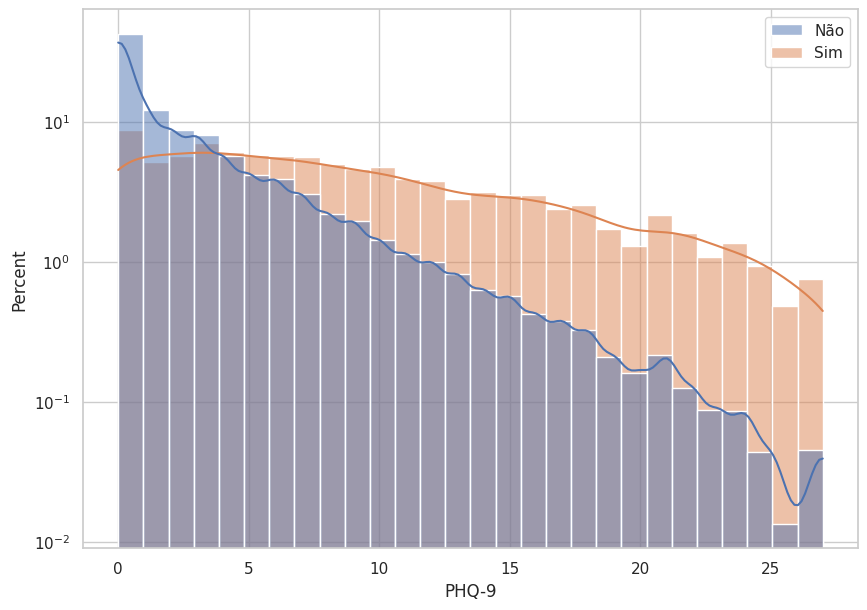

-------------------------------------------------------------



,variavel1,variavel2,titulo,chi2,p_value,dof
0,escolaridade_agregada,renda_pc,Nivel de escolaridade e renda per capita,23047.025547,0.000000e+00,18
1,cor,renda_pc,Raça-cor e renda per capita,7517.540991,0.000000e+00,24
2,N001,escolaridade_agregada,Percepção de saúde e nível de escolaridade,6137.038261,0.000000e+00,12
3,N00101,escolaridade_agregada,Percepção de saúde segundo OMS e nível de esco...,4083.091992,0.000000e+00,12
4,N001,cor,Percepção de saúde e raça-cor,1020.987281,3.588517e-207,16
5,N00101,cor,Percepção de saúde segundo OMS e raça-cor,695.942470,9.444638e-138,16
6,sexo,depression_p,Sexo,650.124456,2.099155e-143,1
7,cor,depression_p,Cor,27.460577,1.604068e-05,4
8,idade_cat,depression_p,Categoria idade,23.635179,1.164392e-06,1
9,escolaridade_agregada,depression_p,Escolaridade,9.630887,2.197894e-02,3


In [5]:
from IPython.display import display_markdown

def gen_chi2_statistics(df_i, columns_dict, key_dep_d = 'depression_p'):

    selected_g = copy.deepcopy(df_i)
    selected_g['depression_p'] = selected_g['depression_severity'] > 3
    data = []

    for c in columns_dict:


        #display(Markdown("### {}".format(c['name'])))
        
        display_markdown('''### {}'''.format(c['name']), raw=True)

        selected = copy.deepcopy(selected_g)

        key_dep = key_dep_d
        if 'dep' in c:
            key_dep = c['dep']

        selected = selected.dropna(subset= [c['key'], key_dep])
        contingency_table = pd.crosstab(selected[c['key']], selected[key_dep])
        chi2, p_value, dof, _ = chi2_contingency(contingency_table, correction=False)


        # Para printar
        contingency_table = pd.crosstab(selected[c['key']], selected[key_dep], normalize=False)
        contingency_table_n = pd.crosstab(selected[c['key']], selected[key_dep], normalize='index')
        contingency_table_c = pd.crosstab(selected[c['key']], selected[key_dep], normalize='columns')

        try:
            contingency_table.index = contingency_table.index.map(PNS_DICT.get_pv_dict(c['key']))
            contingency_table_n.index = contingency_table_n.index.map(PNS_DICT.get_pv_dict(c['key']))
            contingency_table_c.index = contingency_table_c.index.map(PNS_DICT.get_pv_dict(c['key']))
        except:
            pass
        try:
            contingency_table.columns = contingency_table.columns.map(PNS_DICT.get_pv_dict(key_dep))
            contingency_table_n.columns = contingency_table_n.columns.map(PNS_DICT.get_pv_dict(key_dep))
            contingency_table_c.columns = contingency_table_c.columns.map(PNS_DICT.get_pv_dict(key_dep))
        except:
            pass

        display(contingency_table)
        print("Normalizado pelas linhas: ")
        display(contingency_table_n*100)

        print()
        print("Normalizado pelas colunas: ")
        display(contingency_table_c*100)


        print("chi2: {}, p_value: {}, dof: {}".format(chi2, p_value, dof))


        if key_dep == 'depression_p':
            fig, ax = plt.subplots(figsize=(10, 7))
            plot_dist_phq9(selected, c['key'], PNS_DICT.get_pv_dict(c['key']), '', ax)
            plt.show()

        print("-------------------------------------------------------------")
        print()

        data.append([c['key'], key_dep, c['name'], chi2, p_value, dof])

    return pd.DataFrame(data, columns=['variavel1', 'variavel2', 'titulo', 'chi2', 'p_value', 'dof'])

selected_columns = [
    # Gerais
    {'key': 'escolaridade_agregada', 'dep': 'renda_pc', 'name': 'Nivel de escolaridade e renda per capita'},
    {'key': 'cor', 'dep': 'renda_pc', 'name': 'Raça-cor e renda per capita'},
    {'key': 'N001', 'dep': 'escolaridade_agregada', 'name': 'Percepção de saúde e nível de escolaridade'},
    {'key': 'N00101', 'dep': 'escolaridade_agregada', 'name': 'Percepção de saúde segundo OMS e nível de escolaridade'},
    {'key': 'N001', 'dep': 'cor', 'name': 'Percepção de saúde e raça-cor'},
    {'key': 'N00101', 'dep': 'cor', 'name': 'Percepção de saúde segundo OMS e raça-cor'},


    # Gerais depressão
    {'key': 'sexo', 'name': 'Sexo'},
    {'key': 'cor', 'name': 'Cor'},
    {'key': 'idade_cat', 'name': 'Categoria idade'},
    {'key': 'escolaridade_agregada', 'name': 'Escolaridade'},
    {'key': 'N001', 'name': 'Percepção da própria saúde'},
    {'key': 'N00101', 'name': 'Percepção da saúde segundo a OMS'},
    {'key': 'casa_animal', 'name': 'Possui animal de estimação?'},
    {'key': 'renda_pc', 'name': 'Renda per capita'},


    {'key': 'P027', 'name': 'Frequência bebida alcoólica'},
    {'key': 'P050', 'name': 'Fuma tabaco'},
    {'key': 'P034', 'name': 'Atividade fisica nos ultimos 3 meses'},


    # Doenças cronicas
    {'key': 'Q079', 'name': 'Teve diganostico artrite ou reumatismo'},
    {'key': 'Q068', 'name': 'Teve diganostico AVC'},
    {'key': 'Q06306', 'name': 'Teve diganostico doenças cardiovasculares'},
    {'key': 'Q060', 'name': 'Teve diganostico hipercolesterolemia'},
    {'key': 'Q03001', 'name': 'Teve diganostico diabetes'},
    {'key': 'Q00201', 'name': 'Teve diganostico pressão alta'},
    {'key': 'Q120', 'name': 'Teve diganostico cancer'},
    {'key': 'Q092', 'name': 'Teve diganostico depressão'},

]

df_chi = gen_chi2_statistics(df, selected_columns)
df_chi